# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track multi-person head motions and facial muscle movements on a given Youtube video. This notebook was inspired by [DL-CoLab-Notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install OpenFace
The first code snippet installs all the necessary dependencies and may take a while (30~40 minutes). Go make yourself a cup of coffee and watch some Youtube videos to find the clips you'd like to extract facial features from while your environment sets up.


In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/photo/decolorization/decolor.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/photo/hdr_imaging/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/photo/hdr_imaging/hdr_imaging.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/photo/non_photorealistic_rendering/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/photo/non_photorealistic_rendering/npr_demo.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/photo/seamless_cloning/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/photo/seamless_cloning/cloning_demo.cpp  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/photo/seamless_cloning/cloning_gui.cpp  
   creating: opencv-4.1.0/samples/cpp/tutorial_code/snippets/
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/snippets/core_mat_checkVector.cpp  
  inflating: opencv-4.1.0/samples/cpp/tutorial_code/snippets/core_merge.cpp  
  inflating: opencv-4.1.0/samples/cpp/tutorial

## Detect poses on a test video

We are going to detect facial features on the following Youtube video:

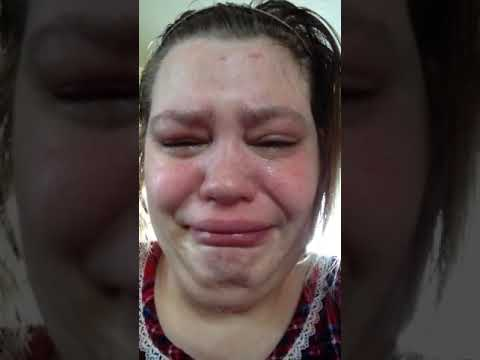

In [5]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'FA9SKKA_0pg'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 10 seconds and do the face detection & feature extraction on that clip. This takes about a minute or two. Instead of `FaceLandmarkVidMulti` you may also use `FeatureExtraction` to extract features of a single face or `FaceLandmarkImg` to extract features on a face image. See full description of the arguments [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments). 

By default the executable will output all features (tracked videos, HOG files, similarity aligned images and a .csv file with landmarks, action units and gaze). You might not always want to extract all the output features, you can specify the desired output using the following flags:

-2Dfp output 2D landmarks in pixels

-3Dfp output 3D landmarks in milimeters

-pdmparams output rigid and non-rigid shape parameters

-pose output head pose (location and rotation)

-aus output the Facial Action Units

-gaze output gaze and related features (2D and 3D locations of eye landmarks)

-hogalign output extracted HOG feaure file

-simalign output similarity aligned images of the tracked faces

-nobadaligned if outputting similarity aligned images, do not output from frames where detection failed or is unreliable (thus saving some disk space)

-tracked output video with detected landmarks

In [21]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4

[youtube] FA9SKKA_0pg: Downloading webpage
[youtube] FA9SKKA_0pg: Downloading MPD manifest
[dashsegments] Total fragments: 63
[download] Destination: youtube.mp4
[download] 100% of 10.19MiB in 00:03
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --

In [0]:
# clear any previous outputs.
!rm -rf processed

In [30]:
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FeatureExtraction -f video.mp4 -out_dir processed

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: ./OpenFace/build/bin/mode

In [32]:
# convert the result into MP4
!ffmpeg -y -loglevel info -i processed/video.avi output.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

Finally, visualize the result:

In [33]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

# Extra: Here are some tips for loading and plotting the data. 

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('processed/video.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 240 
Total shape of dataframe (240, 714)


,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_29,p_30,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.013043,0.123938,-0.992204,-0.225547,0.180963,-0.957278,-0.109,0.155,103.9,106.0,112.1,118.7,121.8,120.3,113.6,107.1,95.1,99.2,104.7,111.2,118.0,123.9,128.5,124.4,118.2,111.3,104.8,99.2,110.6,113.2,115.7,116.5,115.2,112.6,110.2,...,-0.123,0.554,-0.639,-0.062,0.391,2.04,1.84,0.24,0.0,1.89,2.35,0.47,0.40,1.05,1.73,0.61,0.0,0.54,0.0,0.52,0.0,0.40,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.042,0.98,1,0.023356,0.111665,-0.993471,-0.227025,0.169322,-0.959057,-0.104,0.143,101.2,103.3,109.6,116.4,119.7,118.1,111.3,104.5,92.2,96.5,102.0,108.6,115.4,121.4,126.2,122.1,115.7,108.7,102.1,96.4,108.1,110.8,113.3,114.2,112.9,110.1,107.6,...,-0.213,0.472,-0.568,-0.169,0.373,2.34,2.05,0.23,0.0,1.92,2.48,0.31,0.23,0.96,1.67,0.79,0.0,0.43,0.0,0.53,0.0,0.34,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.083,0.98,1,0.019987,0.106874,-0.994072,-0.216657,0.167706,-0.961735,-0.100,0.139,98.8,100.8,106.9,113.5,116.8,115.2,108.6,102.0,90.2,94.3,99.7,106.1,112.8,118.8,123.5,119.5,113.2,106.3,99.9,94.3,105.5,108.2,110.7,111.5,110.2,107.5,105.1,...,-0.184,0.485,-0.570,-0.128,0.364,2.62,2.21,0.23,0.0,1.96,2.60,0.28,0.18,0.95,1.57,0.86,0.0,0.25,0.0,0.48,0.0,0.41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.125,0.98,1,0.022991,0.111606,-0.993487,-0.218449,0.168318,-0.961223,-0.100,0.142,96.4,98.4,104.5,111.1,114.4,112.9,106.3,99.7,87.8,92.0,97.4,103.8,110.4,116.3,121.0,117.0,110.8,103.9,97.5,91.9,103.2,105.8,108.3,109.1,107.8,105.1,102.7,...,-0.209,0.521,-0.490,-0.130,0.373,2.76,2.27,0.18,0.0,2.01,2.68,0.36,0.21,0.92,1.52,0.76,0.0,0.08,0.0,0.40,0.0,0.52,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.167,0.98,1,0.037864,0.116230,-0.992500,-0.207746,0.180598,-0.961367,-0.087,0.151,95.2,97.2,103.2,109.8,113.0,111.5,105.0,98.4,86.4,90.5,95.9,102.2,109.0,114.9,119.5,115.5,109.3,102.5,96.1,90.5,101.9,104.5,106.9,107.7,106.4,103.8,101.4,...,-0.190,0.537,-0.505,-0.135,0.392,2.76,2.15,0.12,0.0,2.08,2.71,0.34,0.37,1.01,1.49,0.90,0.0,0.04,0.0,0.33,0.0,0.57,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# See how many unique faces there are
print("Number of unique faces: ", len(df.face_id.unique()), "\nList of face_id's: ", df.face_id.unique())

Number of unique faces:  4 
List of face_id's:  [0 1 2 3]


It looks like we see 4 faces instead of 3! Let's see how much confidence the algorithm had for detecting each face. 


In [0]:
df.groupby('face_id').mean()['confidence']

face_id
0    0.955367
1    0.888863
2    0.849410
3    0.154000
Name: confidence, dtype: float64

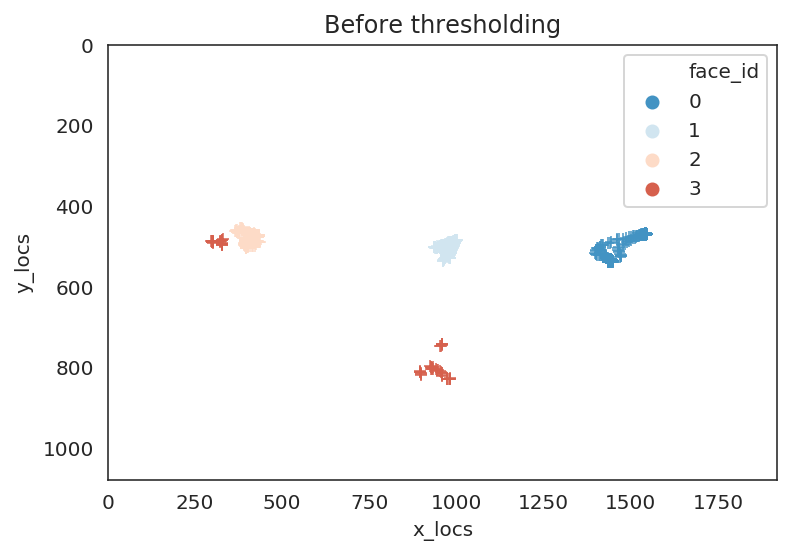

In [0]:
import re
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')
x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
y_locs = df.columns[df.columns.str.contains(y_regex_pat)]
no_unique_faces = len(df.face_id.unique())
palette = sns.color_palette("RdBu_r", no_unique_faces)

avg_face_df = pd.DataFrame({'x_locs':df[x_locs].mean(axis=1), 'y_locs':df[y_locs].mean(axis=1), 'face_id': df.face_id})
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df, marker="+", palette=palette)
ax.set(xlim=[0, 1920], ylim=[1080,0], title="Before thresholding");

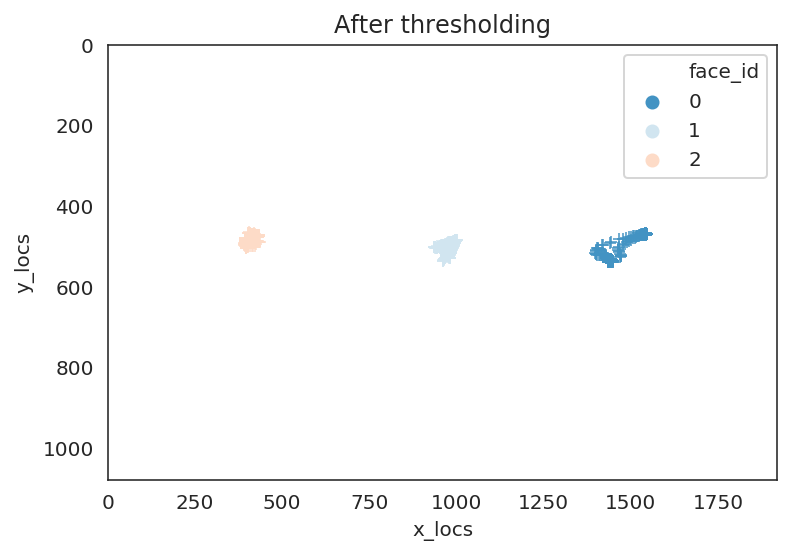

In [0]:
avg_face_df_conf = avg_face_df[df.confidence>=.80]
no_unique_faces = len(avg_face_df_conf.face_id.unique())
ax = sns.scatterplot(x='x_locs', y='y_locs', hue = 'face_id', data=avg_face_df_conf, marker="+", palette=palette[:no_unique_faces])
ax.set(xlim=[0, 1920], ylim=[1080,0], title="After thresholding");

Let's clean our data with a threshold of 80% confidence and plot the AU trajectories for all AUs.


List of AU columns: Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r'],
      dtype='object')


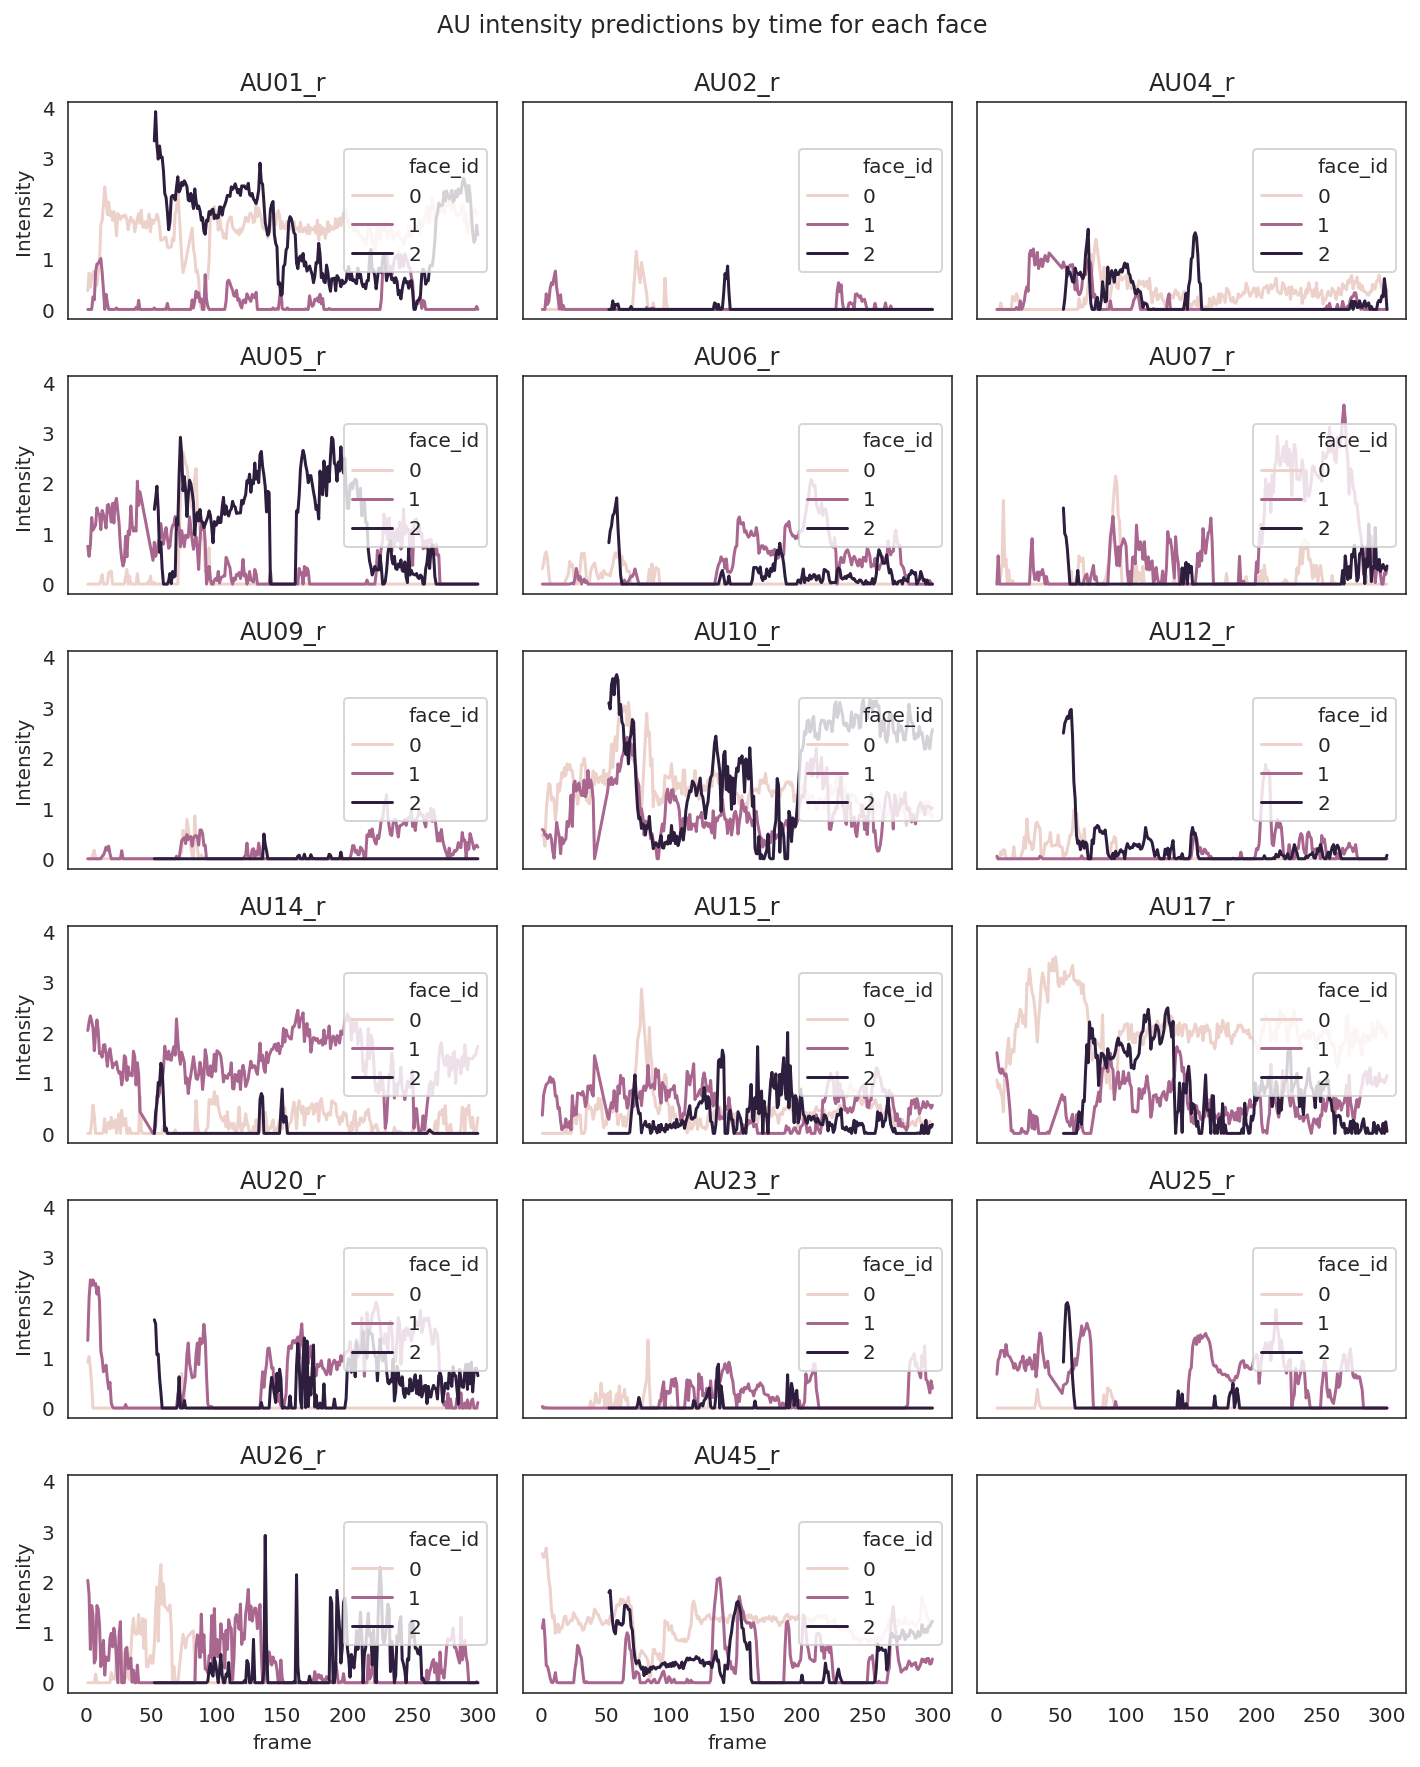

In [0]:
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns = df.columns[df.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions by time for each face", y=1.02)
plt.tight_layout()

We could also compare how synchronized each individuals are to one another during the interaction by using a simple Pearson correlation.

In [0]:
# Let's compare how much AU12 (smiling) activity occurs at similar times across people.
df_clean.pivot(index='frame', columns='face_id', values='AU12_r').corr()

face_id,0,1,2
face_id,,,
0,1.000000,-0.145006,0.451838
1,-0.145006,1.000000,-0.124261
2,0.451838,-0.124261,1.000000


# Lastly, here is just a few lines of code to get you started on working with gaze directions. 

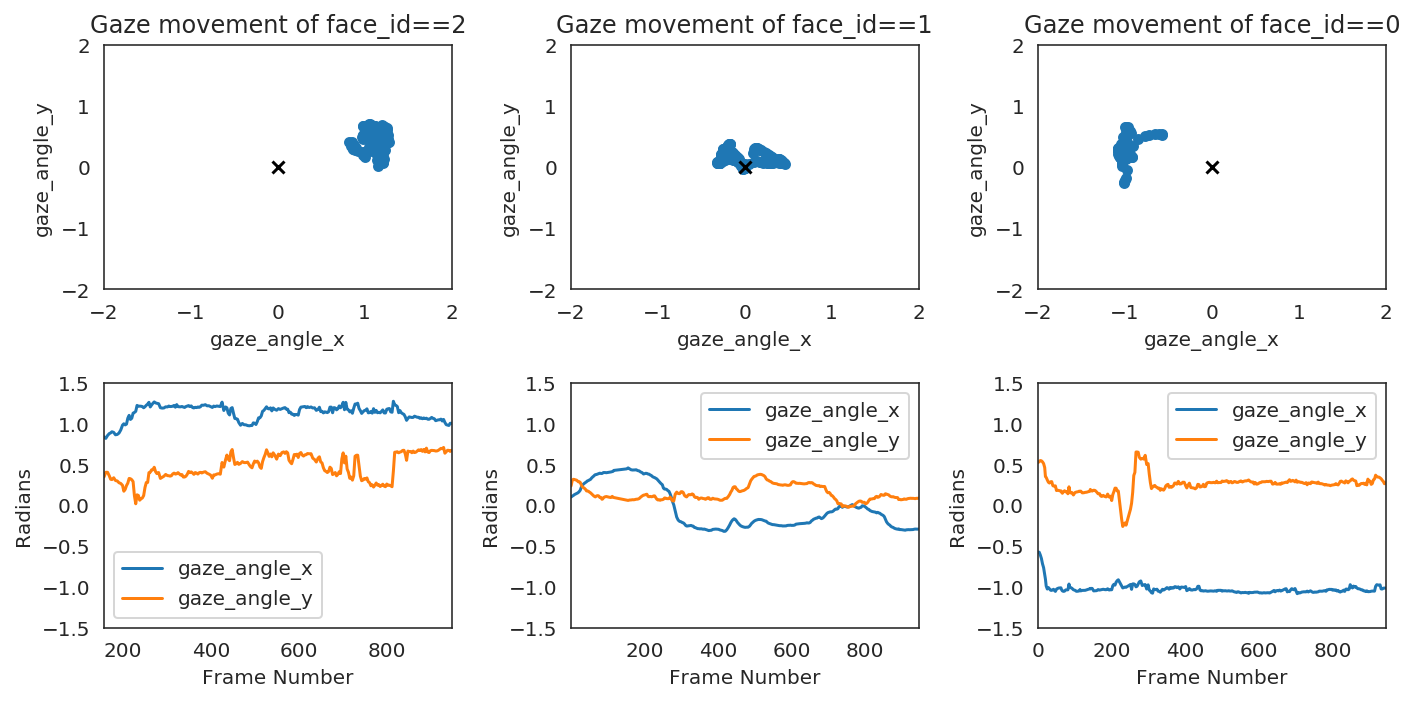

In [0]:
f,axes = plt.subplots(2,len(df_clean.face_id.unique()), figsize=(10,5))
for faces_ix, face_id in enumerate(df_clean.face_id.unique()[::-1]):
  df_clean.query(f'face_id=={face_id}').plot.scatter(x='gaze_angle_x', y='gaze_angle_y', ax=axes[0][faces_ix])
  axes[0][faces_ix].scatter(0,0, marker='x', color = 'k') # draw origin.
  axes[0][faces_ix].set(xlim=[-2,2], ylim=[-2,2], title=f'Gaze movement of face_id=={face_id}')
  df_clean.query(f'face_id=={face_id}')[['gaze_angle_x', 'gaze_angle_y']].plot(ax=axes[1][faces_ix])
  axes[1][faces_ix].set(ylim=[-1.5,1.5], xlabel='Frame Number', ylabel="Radians")
plt.tight_layout()
plt.show()

# That's it for now. Hope you enjoyed this tutorial.

## Additional resources
*   [OpenFace Github Page](https://github.com/TadasBaltrusaitis/OpenFace)
*   [Medium article on more ways to assess synchrony in time series data](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)
*   [Comparison of facial emotion recognition software: OpenFace vs Affectiva vs FACET](https://medium.com/@jinhyuncheong/face-analysis-software-comparison-affectiva-affdex-vs-openface-vs-emotient-facet-5f91a4f12cbb)

*This notebook was prepared by [Jin Hyun Cheong](http://jinhyuncheong.com).*